A SeguraAí é uma fintech de venda de seguros para pessoas físicas. Empresas de Seguros, assim como qualquer outra, dependem da recorrência de gastos dos seus clientes. Em Seguros, essa recorrência vem da Renovação das apólices de Seguros dos clientes. Para entender o que está causando uma queda dessas renovações ao longo do tempo, a área de operações pediu um projeto para a área de Data Analytics para entender e classificar o cliente com risco de não renovar sua apólice no próximo ano.

Para isso, a área de Operações passou uma base de cerca de 23 mil registros de clientes com suas respectivas informações de cadastro e suas decisões de renovação ou não renovação.

Você foi convidado para atuar neste projeto, e como um bom analista de dados, é importante que você organize e estruture todas as etapas do trabalho. Esse material deverá ser apresentado aos executivos responsáveis pela área demandante em meados de Abril/22.



Com base nessas informações, pede-se:
 1) Quais fatores de risco estão associados com a NÃO renovação de seguros?
 2) Quais os possíveis planos de ação que a empresa de seguros pode fazer para diminuir esse problema?



In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos

import matplotlib.pyplot as plt
import seaborn as sns
#from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

SystemError: initialization of _internal failed without raising an exception

In [2]:
df = pd.read_excel('base_Seguros.xlsx', sheet_name = 1)

In [8]:
df.dtypes

Flag_Renovou           int64
Idade                  int64
Perfil_Risco          object
Diferenca_Perfil      object
Genero                object
Profissao             object
Tempo_Apolice          int64
Uso_Veiculo           object
Qte_Apolices           int64
Premio_Final         float64
Premio_Qte_Parc       object
Premio_Pago_Ult      float64
Premio_Mercado       float64
Premio_Orig          float64
Veic_Idade             int64
Veic_Idade_Compra      int64
Veic_Garagem          object
Veic_Potencia         object
Veic_Regiao           object
dtype: object

## Analise exploratória

VIMOS NA ANALISE SE IV QUE NENHUMA VARIAVEL QUALITATIVA TEVE SUAS CATEGORIAS COM ALTO GRAU DE DISSOCIAÇÃO ENTRE SI

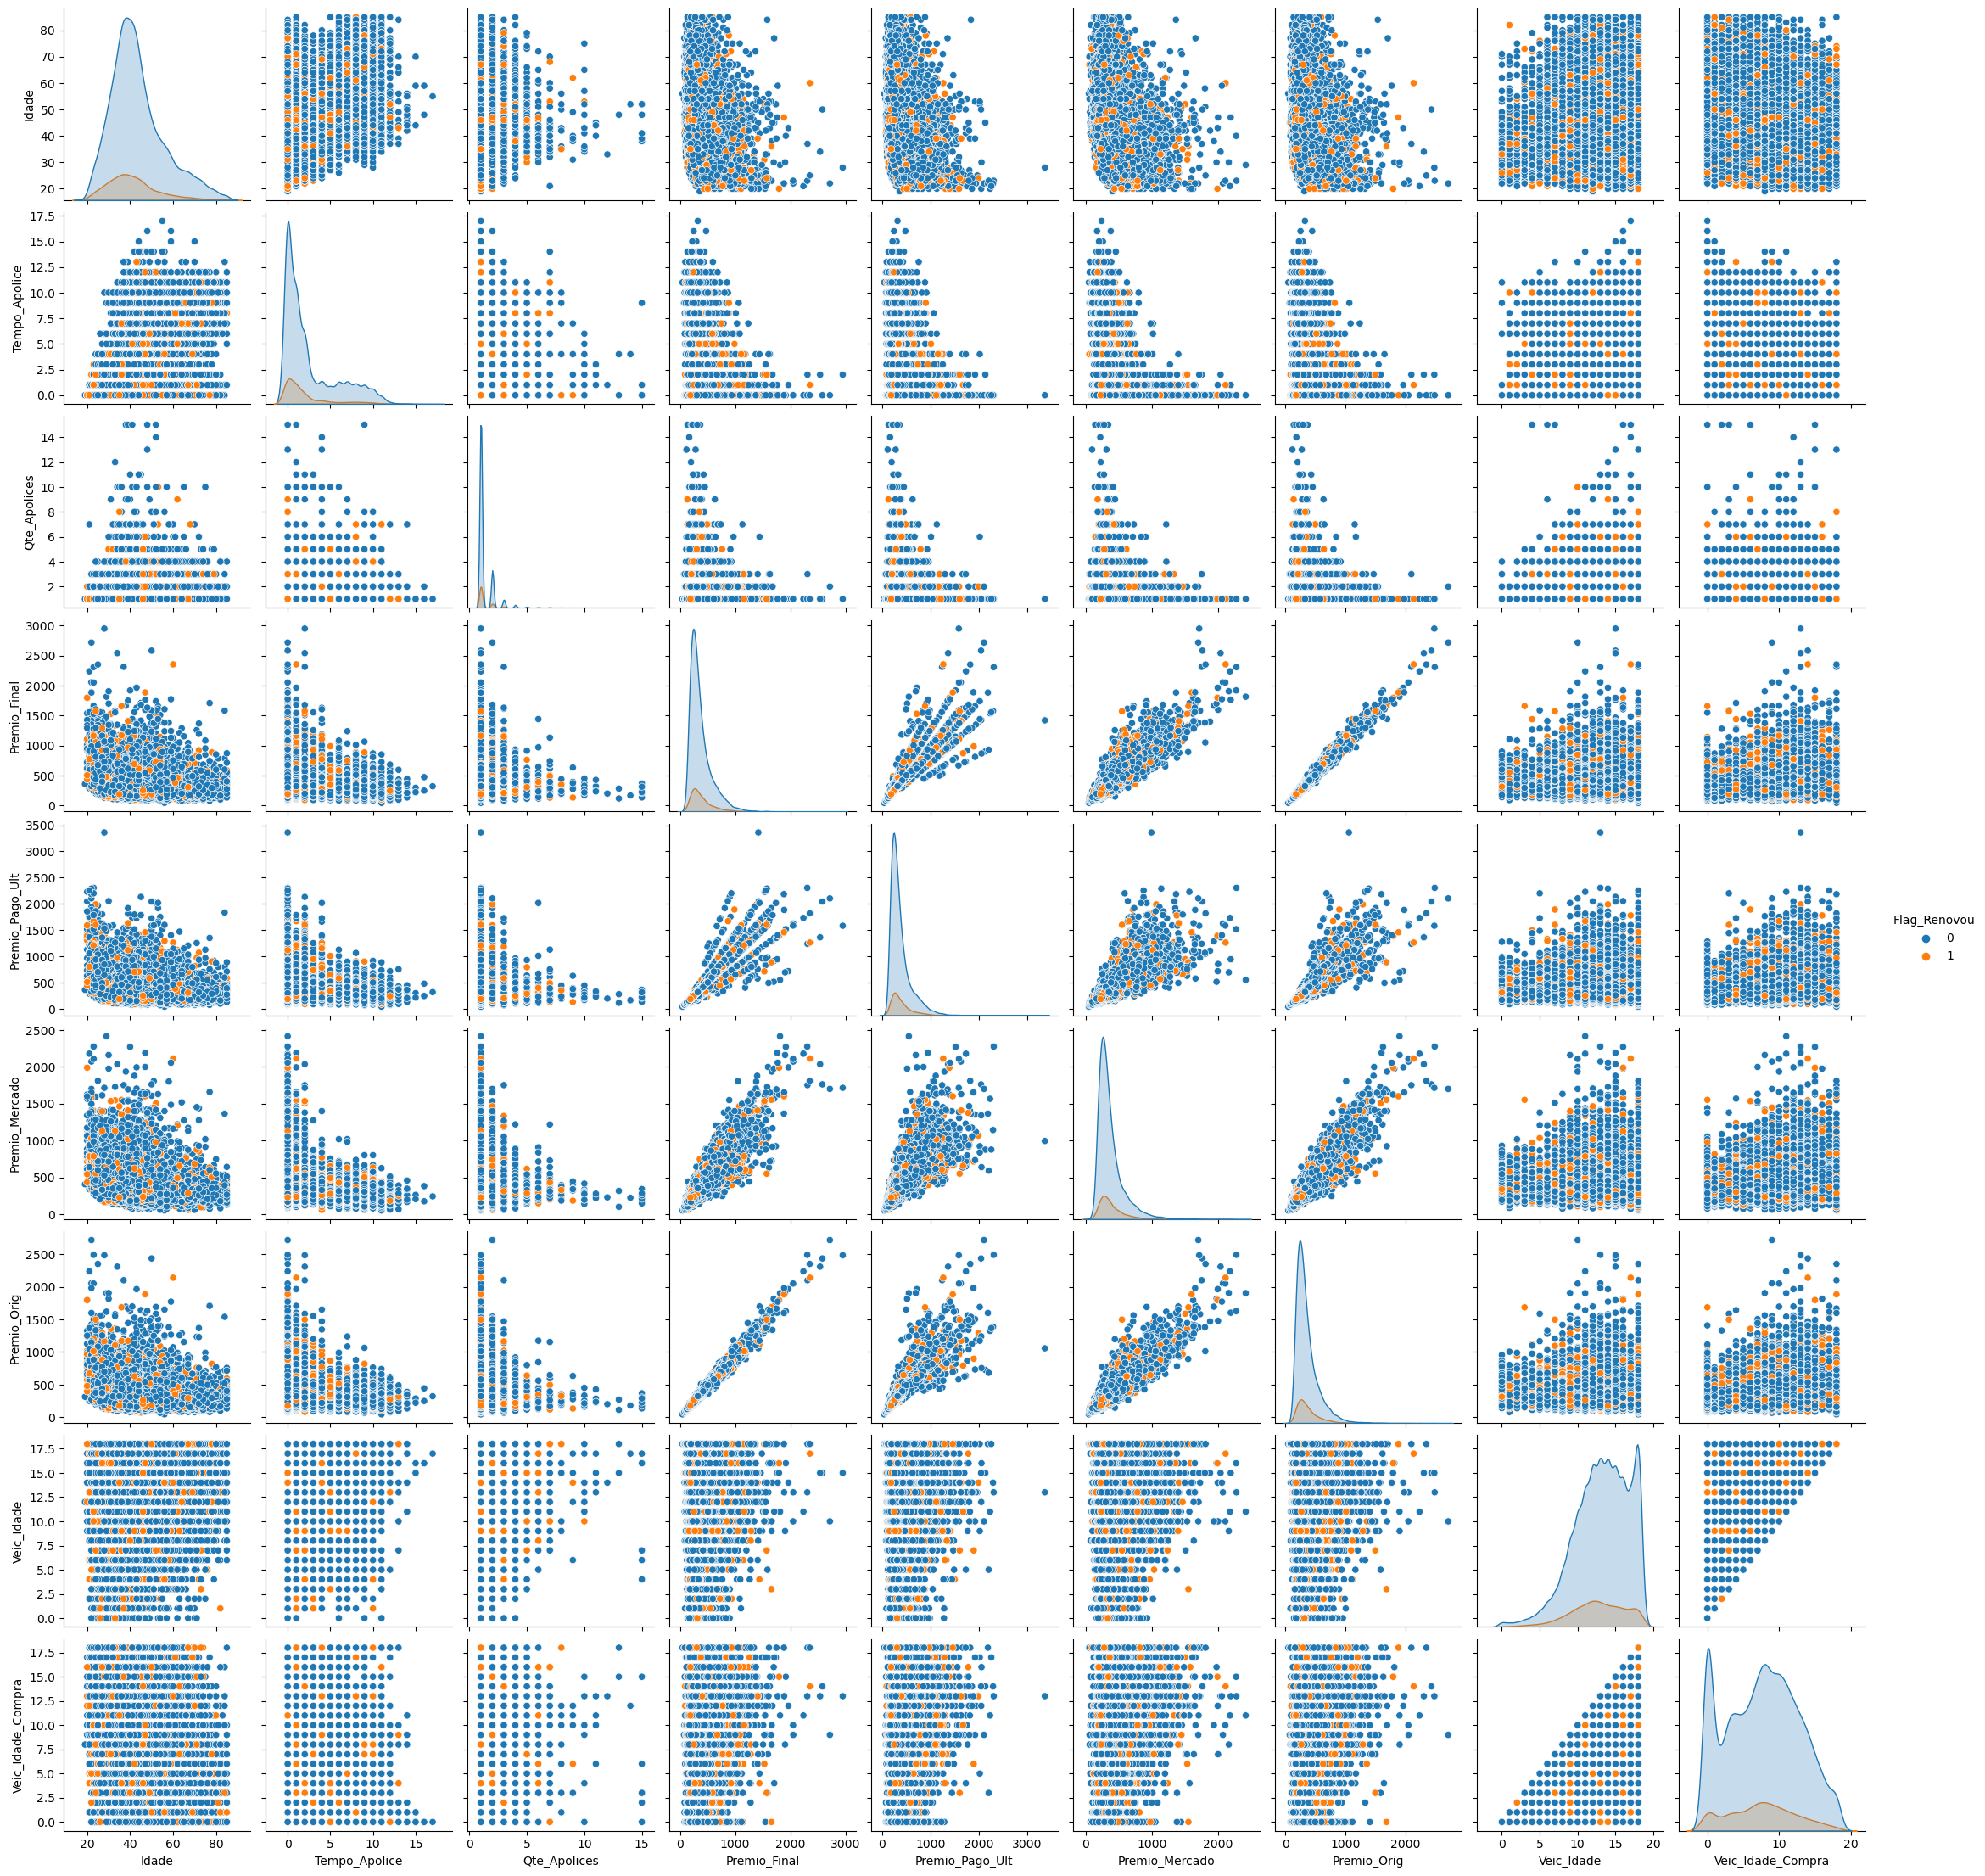

In [9]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Flag_Renovou');

In [3]:
df_rh_iv = aed.analise_iv(df,'Flag_Renovou')
df_rh_iv.get_lista_iv()

C:\Users\tania\Desktop\Preditiva\Estudos de caso\Renovação de Seguros\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Flag_Renovou,IV
Variavel,
Perfil_Risco,0.07
Tempo_Apolice,0.06
Idade,0.04
Veic_Regiao,0.03
Uso_Veiculo,0.03
Premio_Mercado,0.02
Veic_Idade,0.02
Premio_Pago_Ult,0.02
Premio_Qte_Parc,0.02


## Arvore de decisão

OPTAMOS NESSE PROJETO PELA ARVORE DE DECISÃO AFIM DE CRIARMOS UM PERFIL DOS CLIENTES QUE RENOVARAM O FLAG DO SEGURO

#### Ajuste banco de dados para modelagem em arvore de decisao

In [5]:
df_modelo = pd.get_dummies(df)
df_modelo.head()

,Flag_Renovou,Idade,Tempo_Apolice,Qte_Apolices,Premio_Final,Premio_Pago_Ult,Premio_Mercado,Premio_Orig,Veic_Idade,Veic_Idade_Compra,...,Veic_Regiao_Reg13,Veic_Regiao_Reg14,Veic_Regiao_Reg2,Veic_Regiao_Reg3,Veic_Regiao_Reg4,Veic_Regiao_Reg5,Veic_Regiao_Reg6,Veic_Regiao_Reg7,Veic_Regiao_Reg8,Veic_Regiao_Reg9
0,0,38,1,1,232.46,232.47,221.56,243.59,9,8,...,0,0,0,0,0,0,0,1,0,0
1,1,35,1,1,208.53,208.54,247.56,208.54,15,7,...,0,0,0,0,1,0,0,0,0,0
2,1,29,0,1,277.34,277.35,293.32,277.35,14,6,...,0,0,0,0,0,0,0,1,0,0
3,0,33,2,1,239.51,244.40,310.91,219.95,17,10,...,0,0,0,0,0,1,0,0,0,0
4,0,50,8,1,554.54,554.55,365.46,519.50,16,8,...,0,1,0,0,0,0,0,0,0,0


In [6]:
#Divisão dos dados para o modelo
y = df_modelo['Flag_Renovou']

x = df_modelo.drop(['Flag_Renovou'],axis = 1)

#### Modelagem arvore de decisão

In [7]:
#Treinamento do modelo
modelo_Renovação = DecisionTreeClassifier(max_depth=5, 
                                         random_state=42)
modelo_Renovação.fit(x, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Analise de desempenho arvore de decisao 

In [8]:
# Cálculo do desempenho do modelo: Acurácia
round(accuracy_score(y, modelo_Renovação.predict(x)),2)

0.87

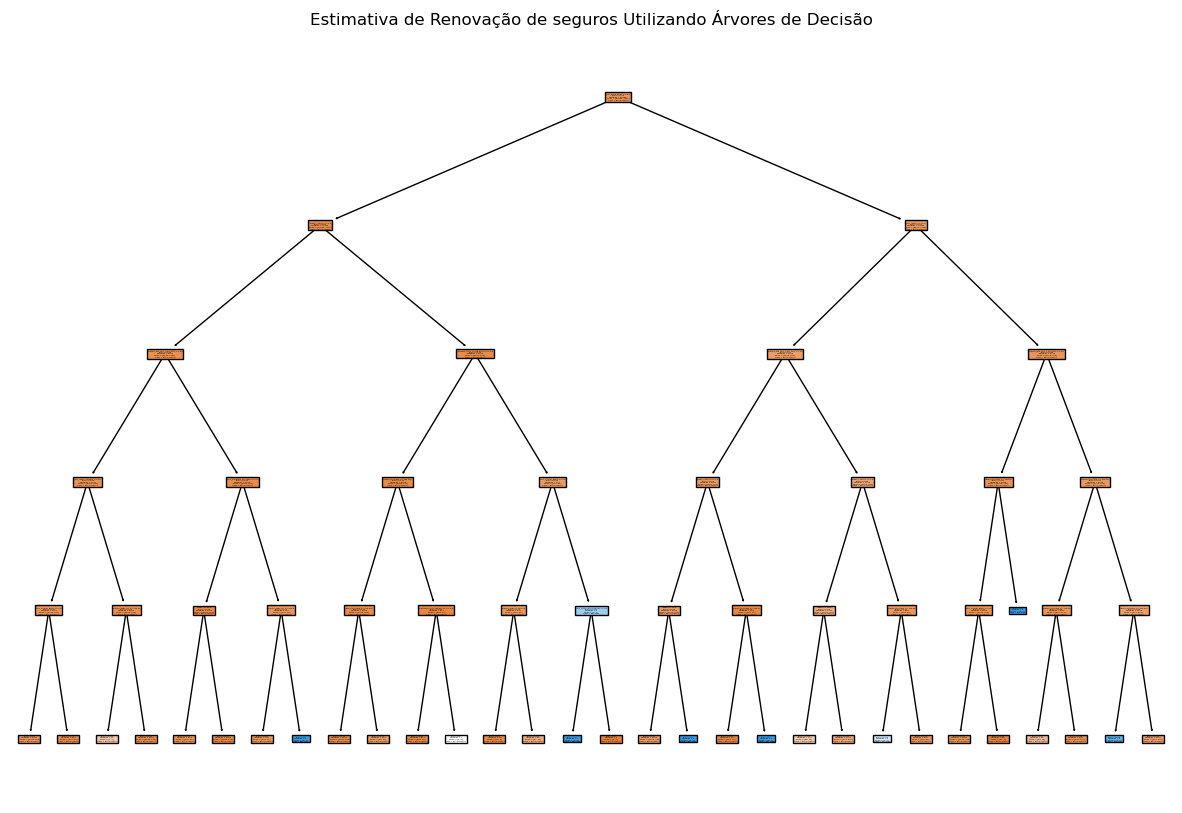

In [9]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_Renovação,
               feature_names=features, 
               class_names=['Não Renovou','Renovou'],
               filled=True);
plt.title("Estimativa de Renovação de seguros Utilizando Árvores de Decisão");